# CS171 - Winter 2020 - Assignment 1
### Instructor: Vagelis Papalexakis
### TA: Ekta Gujral

### Credit for  Assignment 1: 5/40 points of the final grade


In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import random as rd
#make sure you import here everything else you may need

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
data

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Question 1: Data Visualization [20%]

### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

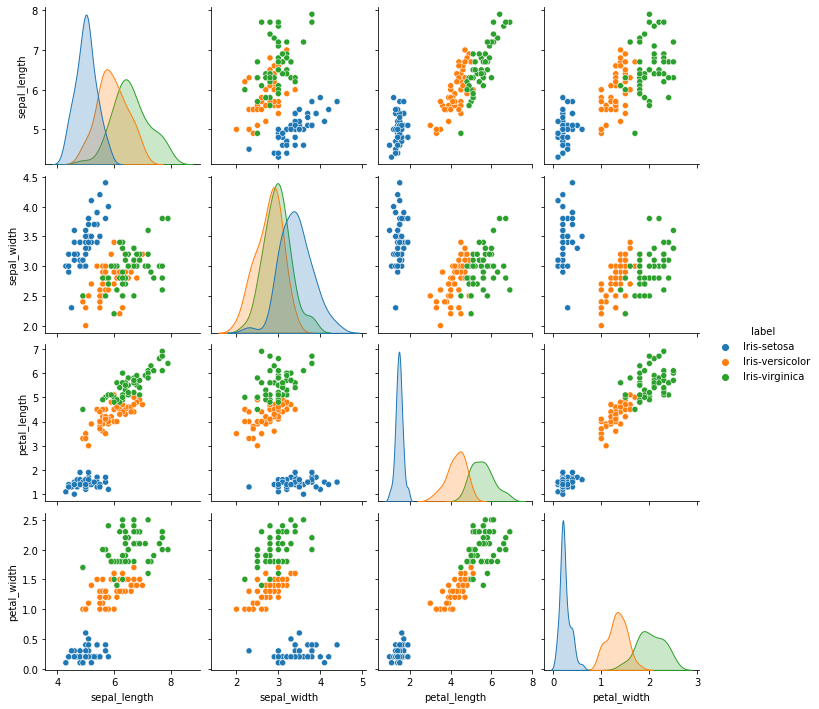

In [3]:
#your code here
features = sb.pairplot(data, hue="label")

Your answer here:
2. The pair of petal_length and petal_witdth is the most correlated amoung these graphs, because these two graphs could drop most amount of data point of a single line.
3. Because it works better the way how human brains are build processes abstract information and visualize a large amounts of complex data by using charts and graphs, which helps to build a visulization for a big amount of data.

### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

Answer:    
1.

<Figure size 432x288 with 0 Axes>

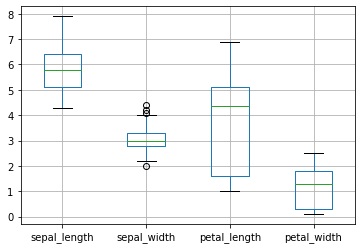

<Figure size 432x288 with 0 Axes>

In [4]:
#your code here
boxplot = data.boxplot(column = data_names[0:4])
plt.figure()

2.

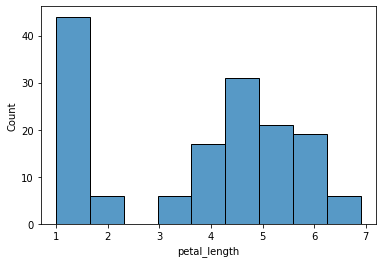

In [5]:
petal_lengths_histogram = sb.histplot(x=data["petal_length"])

Your answer here:

3. Yes, the histogram for petal length give more information than the boxplot. It gives more information such as it has clearer data distributions.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

1.

In [6]:
#your code here
def cal_lp_dist(x,y,p):
    distance = 0
    for i in range(len(x)):
        distance = distance + abs(x[i]-y[i]) ** p
    distance = distance ** (1/p)
    return distance


2.

In [7]:
p1 = data.loc[12].values[:4]
p2 = data.loc[100].values[:4]

o1 = cal_lp_dist(p1,p2,2)
o2 = np.linalg.norm(p1 - p2)

print(o1)
print(o2)

5.409251334519408
5.409251334519408


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

<AxesSubplot:>

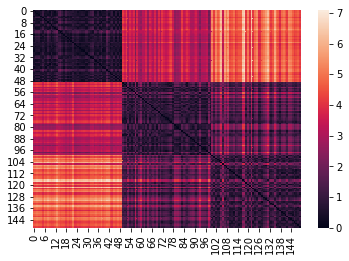

In [8]:
#your code here
DM = np.zeros((len(data),len(data)))

for i in range(len(data)):
    for j in range(len(data)):
        DM[i][j] = cal_lp_dist(list(data.loc[i])[:4], list(data.loc[j])[:4],2)
        
sb.heatmap(DM)

Your answer here:
3. The minimum number of distance computations that I can do is (N * N)/2, because the data on the left lower part is symmetric to the data on the right upper part, so that I need to calculate only half of the whole data table. In addition, since the data on the diagnol are known, there is no need to calculate them again, substract numbers of data on diagonal. Therefore, the final numbers of calculation would be (N * N)/2 - N.
4. The difference between each class is significant, but the difference between alike class is almost identical. 

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

In [20]:
#your code here
def reservoir_sampling(stream,M):
    counter = 0
    reservoir = [None] * M
    for counter in range(M):
        reservoir[counter] = stream.loc[counter]
        
    while(counter < len(stream)):
        counter2 = rd.randrange(counter + 1)
        if(counter2 < M):
            reservoir[counter2] = stream.loc[counter]
        counter = counter + 1
    return reservoir

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

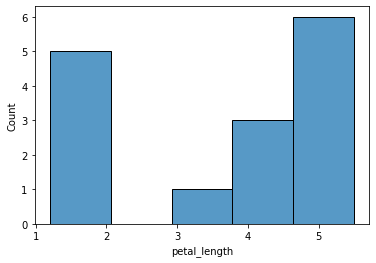

In [10]:
rs_data = pd.DataFrame(reservoir_sampling(data,15))
sb.histplot(x=rs_data["petal_length"])

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

In [22]:
#your code here
def st_sampling(stream, M):
    a1,a2,a3 = [],[],[]
    for counter in range(len(stream)):
        if stream.loc[counter]["label"] == "Iris-setosa":
            a1 = a1.append(stream.loc[counter])
        elif stream.loc[counter]["label"] == "Iris-versicolor":
            a2 = a2.append(stream.loc[counter])
        elif stream.loc[counter]["label"] == "Iris-virginica":
            a3 = a3.append(stream.loc[counter])
            
        
        
        return total
    
st_data = st_sampling(data,15)

NameError: name 'total' is not defined

Your answer here:
3. 

Straitified sampling is better than reservoir sampling because straitified sampling ensure even in each class.